In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import seaborn as sns

#### 머신러닝 응용 
##### 지도학습 - 특징 변수와 알려진 반응 변수를 갖고 있는 데이터 사용 (회귀, 분류)
##### 비지도학습 - 레이블이 부착되지 않았거나 수작업으로 준비되지 않은 원시 데이터를 사용 (군집화)

#### 머신러닝 용어
##### 교차 검증 - 가용한 데이터를 훈련 데이터와 테스트 데이터로 나누는 과정. 새로운 모델을 얼마나 잘 예측하는지 측정하고 과적합 문제를 제한하기 위한 목적
##### 특징 추출 - 적절한 형태로 특징 변수와 해당 특징 행렬을 만드는 작업
##### 차원 축소/특징 선택: 모델의 복잡도를 줄이기 위해 덜 유용한 특징을 제거해 차원 축소 (PCA)

# 회귀

In [4]:
# 50개의 특징을 가진 50개의 표본의 회귀
# 10개의 특징만이 예측력에 기여
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)

In [5]:
# 훈련 집합과 테스트 집합으로 분할
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [6]:
# 일반 선형 회귀를 수행하기 위해 인스턴트 생성
model = linear_model.LinearRegression()

In [7]:
# 데이터에 적합화
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# 모델과 데이터를 제곱 오차합(sse)으로 계산하면 수량화
def sse(resid):
    return sum(resid**2)

In [9]:
# 주어진 특징 집합의 모델을 평가하기 위해 predict 메서드 사용 후 잔차와 SSE 계산
# 잔차 0에 가까우므로 훈련 데이터셋의 경우 과적합 -> 새로운 데이터 예측하는데 부적절
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.3889000641683222e-24

In [10]:
# 테스트 데이터셋 SSE 계산 -> 매우 큰 값으로 예측하는데 부적절
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

412048.2826462942

In [11]:
# 데이터셋에 대한 모델 적합도 측정하는 R-제곱 점수
model.score(X_train, y_train)

1.0

In [12]:
model.score(X_test, y_test)

0.22264557575595012

In [13]:
# 훈련, 테스트 데이터셋의 잔차와 계수값 확인 -> 잔차 규모에 큰 차이가 존재
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

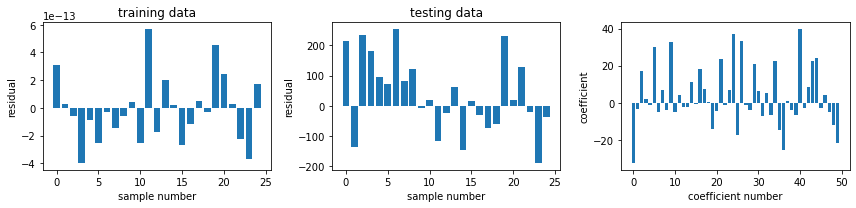

In [14]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

###### 훈련 데이터를 완벽히 적합화하지 않는 방법으로 적합화해 향후 새로운 관측값에 의미 있는 예측이 가능하도록 모델링
###### 가능한 한 특징 변수를 많이 없애고 싶다면 라소 회귀를 L1 정규화와 함께 사용하고 모델 계수의 크기를 제한하려면 리지 회귀와 함께 L2 정규화 사용

In [15]:
# 리지 화귀 분석
# 정규화 강도를 결정하는 알파 매개변수
model = linear_model.Ridge(alpha=2.5)

In [16]:
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [17]:
# 훈련, 테스트 데이터셋의 모델 예측과 SSE 값 계산
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1548.2711243556273

In [18]:
# 훈련 데이터 SSE값은 커졌지만 테스트 데이터에 대한 SSE 감소
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

396331.2647326214

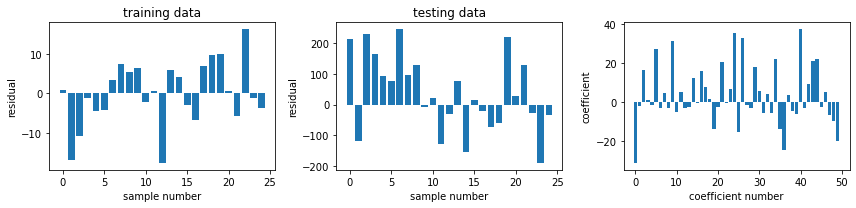

In [19]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [20]:
# 라소 회귀 분석
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [21]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

265.2928592345181

In [22]:
# 훈련 데이터의 SSE가 증가했지만 테스트 데이터의 SSE는 감소
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1441.3947508123454

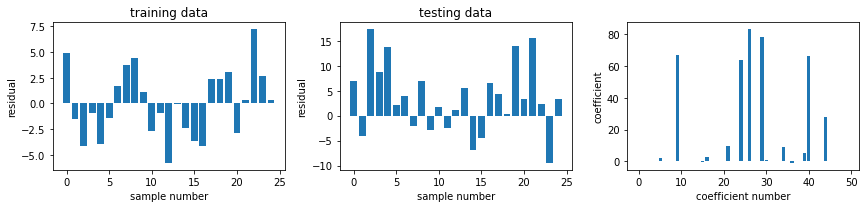

In [23]:
# 계수 벡터가 대부분 0을 가짐 -> 데이터에 사용하기 적합한 방법
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [24]:
# 임의로 설정했던 알파 값을 범위가 수십배씩 차이 나도록 구성
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [25]:
# 알파 값을 바꿔가며 라소 회귀 수행
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.512e+01, tolerance: 8.502e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.227e+01, tolerance: 8.502e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+02, toleranc

Text(0, 0.5, 'sse')

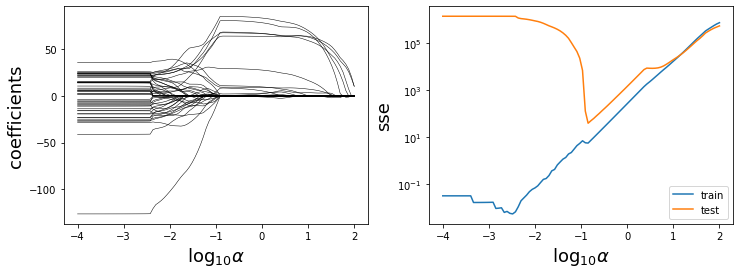

In [26]:
# 알파 값이 매우 작을 때 많은 수의 계수가 0이 아님 -> 지나치게 과적합
# 알파를 특정 임계값 이상으로 증가시키면 많은 계수가 0이 되고 소수만 0이 아닌 값으로 유지
# 훈련 집합의 SSE는 알파가 증가함에 따라 꾸준히 증가하지만 테스트 데이터셋의 SSE는 급격히 감소
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)

In [27]:
# 자동으로 선택된 알파로 라소 기법을 사용하기 위해 인스턴트 생성 후 적합화
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [28]:
# 교차 검증 탐색을 통해 선택된 정규화 강도 매개변수 알파
model.alpha_

0.11177060851665564

In [29]:
# 훈련 데이터셋에 대한 SSE 계산
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

4.1557123550225175

In [30]:
# 테스트 데이터셋에 대한 SSE 계산
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

2.438530683447476

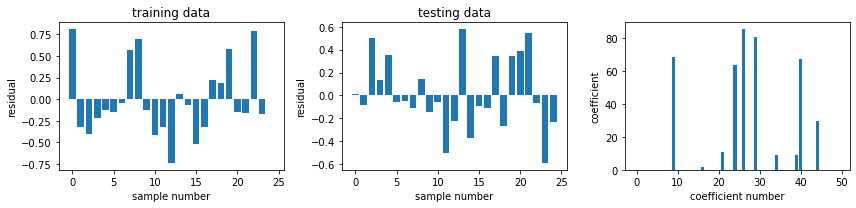

In [31]:
# SSE값을 모델 매개변수와 함께 그래프로 표시
# 훈련, 테스트 데이터셋에서 비교적 높은 정확도로 예측하는 모델을 얻음
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [32]:
# 일래스틱-넷 정규화 -> L1, L2의 상대적 가중값 결정
# 알파와 l1_ratio 매개변수값을 자동으로 찾는 교차 검증 탐색
model = linear_model.ElasticNetCV()
model.fit(X_all, y_all)

ElasticNetCV()

In [33]:
model.alpha_

0.22354121703331126

In [34]:
# l1_ratio = 0.5이므로 라소, 리지 회귀ㅡ이 특성 모두 갖고 있음
model.l1_ratio

0.5

In [35]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

8326.615954534032

In [36]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

8337.246819296519

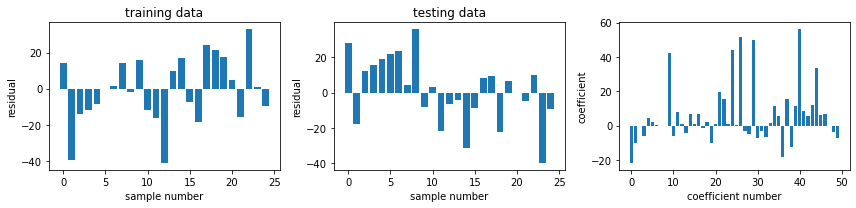

In [37]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

# 분류

In [69]:
# 아이리스 꽃 표본 특징과 각 표본의 종 값이 들어있는 데이터셋 로드
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [70]:
# 특징과 목표 클래스 확인
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
iris.data.shape

(150, 4)

In [73]:
iris.target.shape

(150,)

In [74]:
# 훈련, 테스트 데이터셋 분할 (70% 훈련, 30% 테스트/검증)
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [75]:
# 로지스틱 회귀 분류
classifier = linear_model.LogisticRegression()

In [76]:
# 적합화
classifier.fit(X_train, y_train)

C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# 테스트 데이터셋 예측
y_test_pred = classifier.predict(X_test)

In [78]:
# 분류기의 성능과 정확성을 분석하는 헬퍼 함수
# 거짓 부정과 거짓 긍정에 관련된 분류 척도 관련 정보 요약
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [79]:
# 혼동 행렬
# 1, 3 부류는 모든 요소 정확히 분류했지만 2부류는 1개 요소 잘못 분류
metrics.confusion_matrix(y_test, y_test_pred)

array([[20,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 11]], dtype=int64)

In [80]:
# 각 행 요소의 합하면 총 표본 개수와 같음
np.bincount(y_test)

array([20, 14, 11], dtype=int64)

In [81]:
# 로지스틱 회귀 대신 의사 결정 트리 사용하여 예측
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[20,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 10]], dtype=int64)

In [82]:
# 다양한 분류기 성능 비교
# 훈련 집합의 크기를 10~90% 사이에서 변화시키면서 배열 생성
train_size_vec = np.linspace(0.1, 0.9, 30)

In [83]:
# 분류기 클래스의 리스트 생성
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [84]:
# 훈련 집합 크기의 비율과 혼돈 행렬의 대각을 저장할 배열 생성
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [85]:
# 분류기를 훈련시키면서 테스트 데이터 값을 예측하고 혼돈 행렬 계산 후 
# 그 대각을 이상적인 수치로 나눈 값으로 저장
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

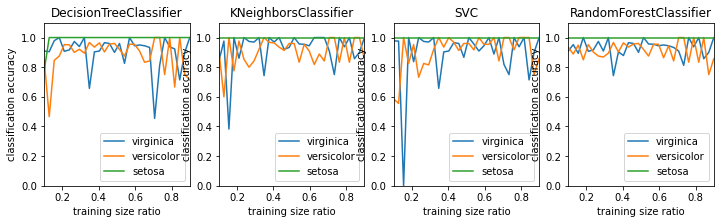

In [86]:
# 분류기의 정확도 비교
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

# 클러스터링

##### K-평균 알고리즘 - 그룹 중심으로부터의 제곱 편차 합계가 최소화되도록 표본을 그룹화
##### 평균-이동 알고리즘 - 데이터를 밀도 함수에 적합화시켜 표본을 그룹화

In [106]:
# 아이리스 데이터를 로딩 후 특징과 목표 데이터를 각 변수에 저장
X, y = iris.data, iris.target

In [107]:
# 3개의 클러스터 사용(꽃의 종류)
# kmeans 클랫 ㅡ인스턴스 생성
n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)

In [108]:
clustering.fit(X)

KMeans(n_clusters=3)

In [109]:
# 클러스터링 결과를 얻기 위해 훈련 특징 데이터셋으로 predict 메서드 호출
y_pred = clustering.predict(X)

In [110]:
# 클러스터링 결과
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [111]:
# 아이리스 표본의 지도 분류와 비교
# -> 클러스터링 출력은 지도 분류의 목표 벡터에서 사용했던 것과는 다른 정숫값을 그룹에 할당
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [112]:
# 행렬로 비교하려면 동일한 그룹에 동일한 정숫값이 사용되어야 하므로 배열 변형
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [113]:
# confusion_matrix 함수를 사용해 지도 분류와 비지도 분류가 일치한지 확인
# 첫번째 그룹은 정확히 식별했지만 두번째, 세번째 그룹은 서로 중첩된 표본으로 인해 완전히 분리x
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

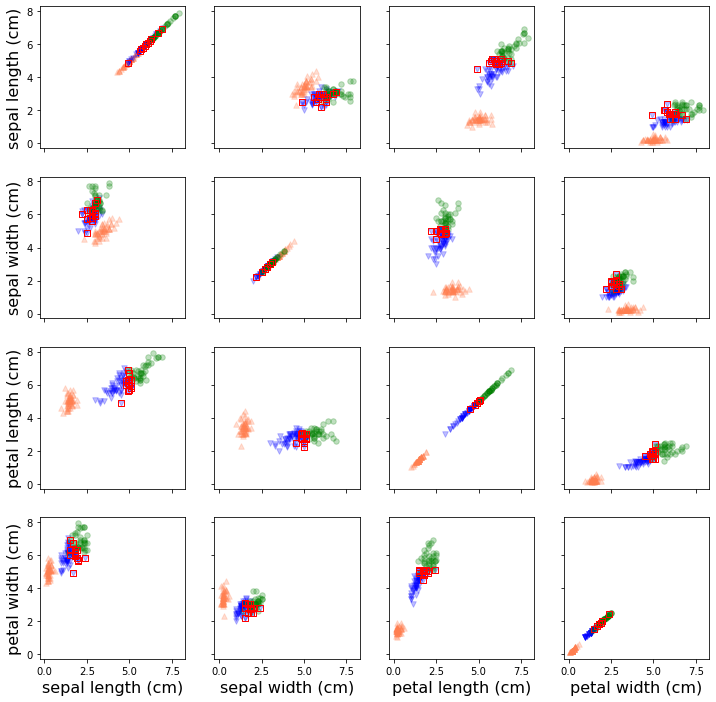

In [114]:
# 결과를 산포도로 도식화
# 지도 분류에 일치하지 않는 표본에는 빨간색 사각형 표시
N = X.shape[1]
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)